In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)
%matplotlib inline 

d={}
tables_req=['bene_summart','hcahps','hrrd','ipps','state_code']
for x in tables_req:
        
        dataframe=pd.read_csv('C:/Users/utsavd/Downloads/gov agencies/{}.csv'.format(x),encoding='cp1252')
        d["{}".format(x)]=dataframe

In [20]:
def capitalize_after_hyphen(x):
    a=list(x)
    a[p.index('-')+1]=a[p.index('-')+1].capitalize()
    x=''.join(a)
    return ''.join(a)

import pandas as pd
import requests  
#l=['patients','admdissions','diagnoses','drg-codes','icu-stays','procedures','prescriptions','d-icd-diagnoses','d-icd-procedures']
url1="http://ec2-54-88-151-77.compute-1.amazonaws.com:3004/v1/hrrd-table?limit=10000&offset=0"
url2="http://ec2-54-88-151-77.compute-1.amazonaws.com:3004/v1/ipps-table?limit=10000&offset=0"
url3="http://ec2-54-88-151-77.compute-1.amazonaws.com:3004/v1/hcahps-table?limit=10000&offset=0"
url4="http://ec2-54-88-151-77.compute-1.amazonaws.com:3002/v1/state-codes?limit=10000&offset=0"
url5="http://ec2-54-88-151-77.compute-1.amazonaws.com:3002/v1/beneficiary-summaries?limit=10000&offset=0"

d={}
url=[url1,url2,url3,url4,url5]

for x in url:  
    p = x[(x.index('v1/')+len('v1/')):x.index('?limit')]
    if p=='state-codes':
        p='stateCode'
    else:
        
        try:
            p=capitalize_after_hyphen(p)
        except:
            pass
        try:
            p=p[:p.index('-')]+p[p.index('-')+1:]
        except:
            pass

        try:
            p=capitalize_after_hyphen(p)
        except:
            pass
        try:
            p=p[:p.index('-')]+p[p.index('-')+1:]
        except:
            pass
    
    
    
    print(p)
    
    d['{}'.format(p)]=pd.DataFrame(requests.get(x).json()['{}'.format(p)])


hrrdTable
ippsTable
hcahpsTable
stateCode
beneficiarySummaries


In [21]:
d['bene_summart'] = d['beneficiarySummaries']
d['state_code'] = d['stateCode']
d['hcahps'] = d['hcahpsTable']
d['ipps'] = d['ippsTable']
d['hrrd'] = d['hrrdTable']

In [22]:
df=pd.merge(d['bene_summart'],d['state_code'],left_on='SP_STATE_CODE',right_on='id',how='left')
df.drop(['index'],axis=1,inplace=True)

In [23]:
df

,BENE_BIRTH_DT,BENE_COUNTY_CD,BENE_DEATH_DT,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,BENE_RACE_CD,BENE_SEX_IDENT_CD,BENE_SMI_CVRAGE_TOT_MONS,BENRES_CAR,BENRES_IP,BENRES_OP,DESYNPUF_ID,MEDREIMB_CAR,MEDREIMB_IP,MEDREIMB_OP,PLAN_CVRG_MOS_NUM,PPPYMT_CAR,PPPYMT_IP,PPPYMT_OP,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STATE_CODE,SP_STRKETIA,id,state_code
0,19390401,0,NaN,0,5,12,1,1,5,0,0,0,15F20297C8E7908D,0,0,0,12,0,0,0,2,2,2,2,2,2,2,2,2,2,6,2,6,CO
1,19410601,40,NaN,0,12,0,1,1,12,0,0,0,15F207DF59ED80F8,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,7,2,7,CT
2,19340401,60,NaN,0,12,0,1,2,12,0,0,0,15F2F7DA6584F12C,0,0,0,12,0,0,0,2,2,2,2,2,2,2,2,2,2,34,2,34,NC
3,19370501,570,NaN,0,12,12,2,2,12,40,0,0,15F38AE499BFF322,150,0,0,12,0,0,0,2,2,2,2,2,2,2,2,2,2,14,2,14,IL
4,19090301,440,NaN,0,12,12,1,2,12,640,0,260,15F39818AAC99679,1530,0,1050,12,20,0,0,2,2,2,2,2,1,1,1,1,1,49,2,49,VA
5,19590301,70,NaN,Y,12,0,1,2,12,3090,2048,2040,15F520995708F16A,13520,13200,4550,12,200,0,0,2,1,1,2,1,1,1,1,2,1,22,1,22,MA
6,19310101,730,NaN,0,12,0,1,2,7,280,0,0,15F574B55FBB6E16,910,0,0,12,0,0,0,2,2,2,2,2,1,1,1,1,2,23,2,23,MI
7,19290601,120,NaN,0,12,0,1,1,12,230,0,160,15F69E55496D62D6,1040,0,920,12,60,0,0,2,1,2,2,2,1,1,1,2,2,49,2,49,VA
8,19270701,60,NaN,0,12,0,1,1,12,230,0,0,15F6D70E476747F9,820,0,0,12,0,0,0,1,2,2,2,2,2,1,1,2,2,53,2,53,WY
9,19220401,331,NaN,0,12,0,1,2,12,120,0,150,15F7E9C08F754F93,660,0,830,0,0,0,0,2,1,2,2,2,2,2,1,2,1,33,2,33,NY


In [24]:
d['hcahps']

,footnote,hcahps_answer_description,hcahps_answer_percent,hcahps_measure_id,hcahps_question,measure_end_date,measure_start_date,state
0,20 - State and national averages do not include VHA hospital data.,"Room was ""always"" clean",72%,H_CLEAN_HSP_A_P,"Patients who reported that their room and bathroom were ""Always"" clean",03/31/2017,04/01/2016,AK
1,20 - State and national averages do not include VHA hospital data.,"Room was ""sometimes"" or ""never"" clean",8%,H_CLEAN_HSP_SN_P,"Patients who reported that their room and bathroom were ""Sometimes"" or ""Never"" clean",03/31/2017,04/01/2016,AK
2,20 - State and national averages do not include VHA hospital data.,"Room was ""usually"" clean",20%,H_CLEAN_HSP_U_P,"Patients who reported that their room and bathroom were ""Usually"" clean",03/31/2017,04/01/2016,AK
3,20 - State and national averages do not include VHA hospital data.,"Nurses ""always"" communicated well",75%,H_COMP_1_A_P,"Patients who reported that their nurses ""Always"" communicated well",03/31/2017,04/01/2016,AK
4,20 - State and national averages do not include VHA hospital data.,"Nurses ""sometimes"" or ""never"" communicated well",4%,H_COMP_1_SN_P,"Patients who reported that their nurses ""Sometimes"" or ""Never"" communicated well",03/31/2017,04/01/2016,AK
5,20 - State and national averages do not include VHA hospital data.,"Nurses ""usually"" communicated well",21%,H_COMP_1_U_P,"Patients who reported that their nurses ""Usually"" communicated well",03/31/2017,04/01/2016,AK
6,20 - State and national averages do not include VHA hospital data.,"Doctors ""always"" communicated well",80%,H_COMP_2_A_P,"Patients who reported that their doctors ""Always"" communicated well",03/31/2017,04/01/2016,AK
7,20 - State and national averages do not include VHA hospital data.,"Doctors ""sometimes"" or ""never"" communicated well",5%,H_COMP_2_SN_P,"Patients who reported that their doctors ""Sometimes"" or ""Never"" communicated well",03/31/2017,04/01/2016,AK
8,20 - State and national averages do not include VHA hospital data.,"Doctors ""usually"" communicated well",15%,H_COMP_2_U_P,"Patients who reported that their doctors ""Usually"" communicated well",03/31/2017,04/01/2016,AK
9,20 - State and national averages do not include VHA hospital data.,"Patients ""always"" received help as soon as they wanted",73%,H_COMP_3_A_P,"Patients who reported that they ""Always"" received help as soon as they wanted",03/31/2017,04/01/2016,AK


In [25]:
d['hrrd']

,end_date,excess_readmission_ratio,expected_readmission_rate,footnote,hospital_name,measure_name,number_of_discharges,number_of_readmissions,predicted_readmission_rate,provider_number,start_date,state
0,30-JUN-16,Not Available,Not Available,1.0,HIGHLANDS MEDICAL CENTER,READM-30-AMI-HRRP,Not Available,Not Available,Not Available,10061,01-JUL-13,AL
1,30-JUN-16,0.9853,14.6,NaN,CLAY COUNTY HOSPITAL,READM-30-PN-HRRP,103,14,14.4,10073,01-JUL-13,AL
2,30-JUN-16,1.4044,4.3,NaN,NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,READM-30-HIP-KNEE-HRRP,404,31,6.1,10078,01-JUL-13,AL
3,30-JUN-16,0.9653,17.3,NaN,NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,READM-30-PN-HRRP,544,89,16.7,10078,01-JUL-13,AL
4,30-JUN-16,1.0204,4.2,NaN,ATHENS LIMESTONE HOSPITAL,READM-30-HIP-KNEE-HRRP,Not Available,Too Few to Report,4.3,10079,01-JUL-13,AL
5,30-JUN-16,1.0616,16.0,NaN,ATHENS LIMESTONE HOSPITAL,READM-30-PN-HRRP,321,58,17.0,10079,01-JUL-13,AL
6,30-JUN-16,1.1927,4.8,NaN,SOUTH BALDWIN REGIONAL MEDICAL CENTER,READM-30-HIP-KNEE-HRRP,184,14,5.8,10083,01-JUL-13,AL
7,30-JUN-16,0.9881,21.8,NaN,DECATUR MORGAN HOSPITAL-DECATUR CAMPUS,READM-30-HF-HRRP,703,151,21.6,10085,01-JUL-13,AL
8,30-JUN-16,1.1706,4.1,NaN,DECATUR MORGAN HOSPITAL-DECATUR CAMPUS,READM-30-HIP-KNEE-HRRP,455,25,4.8,10085,01-JUL-13,AL
9,30-JUN-16,1.0235,16.8,NaN,DECATUR MORGAN HOSPITAL-DECATUR CAMPUS,READM-30-PN-HRRP,764,133,17.2,10085,01-JUL-13,AL


In [26]:
d['ipps']

,average_covered_charges,average_medicare_payments,average_total_payments,drg_definition,hospital_referral_region_description,provider_city,provider_id,provider_name,provider_state,provider_street_address,provider_zip_code,total_discharges
0,$16929.77,$2976.66,$3974.00,069 - TRANSIENT ISCHEMIA,VA - Richmond,SOUTH HILL,490098,"COMMUNITY MEMORIAL HEALTHCENTER, INC",VA,125 BUENA VISTA CIRCLE,23970,18
1,$15253.13,$3208.26,$4592.21,069 - TRANSIENT ISCHEMIA,VA - Arlington,FAIRFAX,490101,INOVA FAIR OAKS HOSPITAL,VA,3600 JOSEPH SIEWICK DRIVE,22033,23
2,$22240.96,$3176.57,$4563.69,069 - TRANSIENT ISCHEMIA,VA - Arlington,RESTON,490107,RESTON HOSPITAL CENTER,VA,1850 TOWN CENTER PARKWAY,20190,26
3,$13823.57,$3768.92,$4656.07,069 - TRANSIENT ISCHEMIA,VA - Roanoke,WYTHEVILLE,490111,WYTHE COUNTY COMMUNITY HOSPITAL,VA,600 WEST RIDGE ROAD,24382,14
4,$33104.85,$3239.54,$4271.22,069 - TRANSIENT ISCHEMIA,VA - Richmond,RICHMOND,490112,CJW MEDICAL CENTER,VA,1401 JOHNSTON WILLIS DRIVE,23235,57
5,$11744.08,$3778.25,$4678.37,069 - TRANSIENT ISCHEMIA,VA - Arlington,WOODBRIDGE,490113,SENTARA POTOMAC HOSPITAL,VA,2300 OPITZ BOULEVARD,22191,35
6,$11276.50,$3268.66,$4266.00,069 - TRANSIENT ISCHEMIA,TN - Kingsport,BIG STONE GAP,490114,WELLMONT LONESOME PINE HOSPITAL,VA,1990 HOLTON AVENUE EAST,24219,18
7,$8946.00,$3312.50,$4295.00,069 - TRANSIENT ISCHEMIA,NC - Winston-Salem,GALAX,490115,TWIN COUNTY REGIONAL HOSPITAL,VA,200 HOSPITAL DRIVE,24333,24
8,$14022.72,$3049.45,$4423.59,069 - TRANSIENT ISCHEMIA,VA - Roanoke,PULASKI,490116,LEWISGALE HOSPITAL PULASKI,VA,2400 LEE HIGHWAY,24301,22
9,$26536.06,$3095.69,$4565.51,069 - TRANSIENT ISCHEMIA,VA - Richmond,RICHMOND,490118,HENRICO DOCTORS' HOSPITAL,VA,1602 SKIPWITH ROAD,23229,49


In [27]:
df.drop(['SP_STATE_CODE','id'],axis=1,inplace=True)
df=df[['state_code','MEDREIMB_IP','BENRES_IP']]
df['total']=df[['MEDREIMB_IP','BENRES_IP']].sum(axis=1)
df.columns=['state','insurance','personal','total']

C:\Users\ankitkt\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df['percent_personal']=df['personal']/df['total']

C:\Users\ankitkt\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df=df.fillna(0)

In [30]:
df[['insurance','personal','total','percent_personal']]=df[['insurance','personal','total','percent_personal']].astype(float).round(2)

In [31]:
a=df.groupby('state')

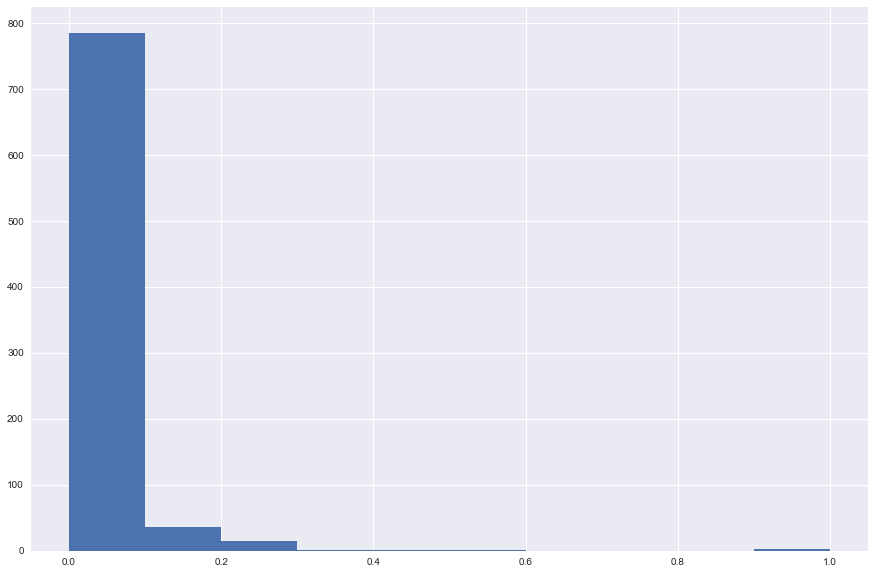

In [32]:
plt.figure(figsize=(15,10))
a.get_group('CA')['percent_personal'].hist()

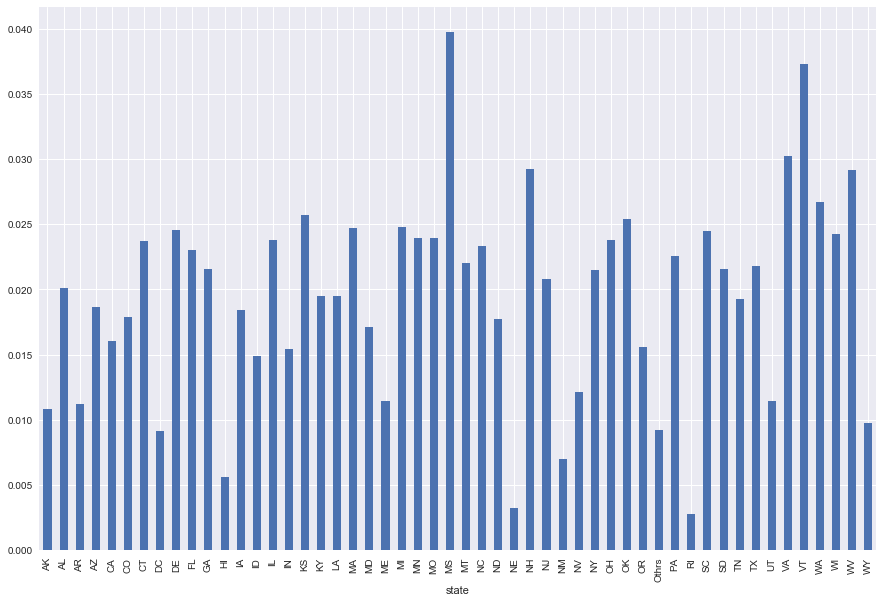

In [33]:
plt.figure(figsize=(15,10))
df.groupby('state')['percent_personal'].mean().plot.bar()

In [34]:
b=d['hcahps'].groupby('state')

In [35]:
d['hcahps']=d['hcahps'][['state','hcahps_answer_description','hcahps_answer_percent']]

In [36]:
d['hcahps'].columns=['state','answer','percent']

In [37]:
states=list(d['hcahps']['state'].unique())

In [38]:
l=list(d['hcahps']['answer'].unique())
df2=pd.DataFrame(index=states,columns=l)

In [39]:
for x in list(df2.index): #state
    for j in df2.columns: #question
        for a in range(0,d['hcahps'].shape[0]):
            if (x==d['hcahps'].loc[a,'state'])&(j==d['hcahps'].loc[a,'answer']):
                df2.loc[x,j]=d['hcahps'].loc[a,'percent']
                
                

In [40]:
df1=pd.merge(df.groupby('state')[['insurance','personal','total']].mean().reset_index(),df2.reset_index(),left_on='state',right_on='index',how='right')

In [41]:
df1.drop('index',axis=1,inplace=True)

In [42]:
df1=df1.set_index('state')

In [43]:
df1[['insurance','personal','total']]=df1[['insurance','personal','total']].round(2)

In [44]:
for x in df1.columns:
    try:
        df1[x]=df1[x].str.strip('%')
    except:
        pass

In [45]:
df1=df1.astype(float)

In [46]:
plt.rcParams["figure.figsize"] = [15,10]

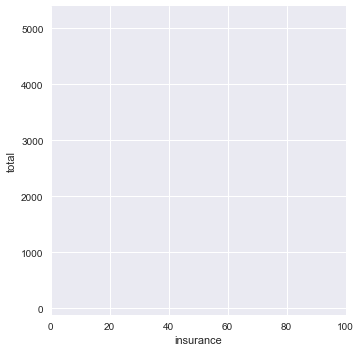

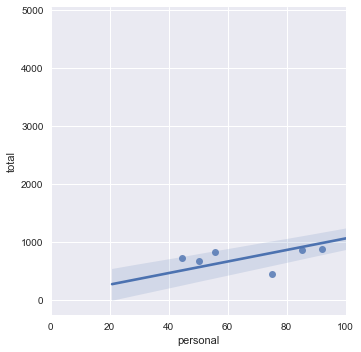

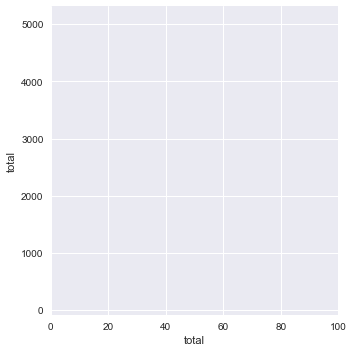

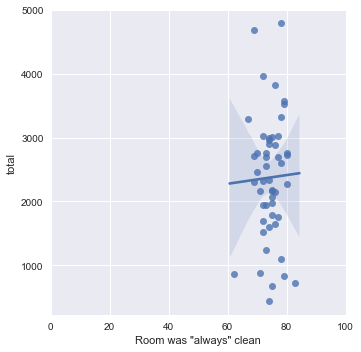

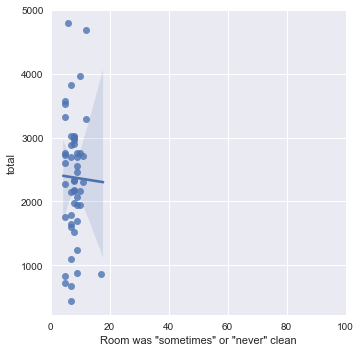

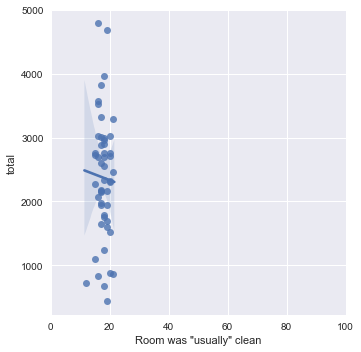

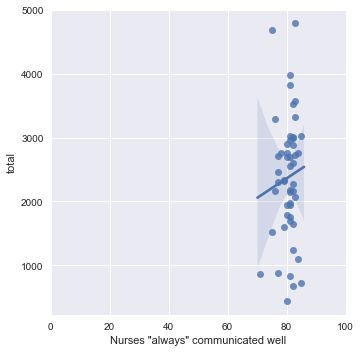

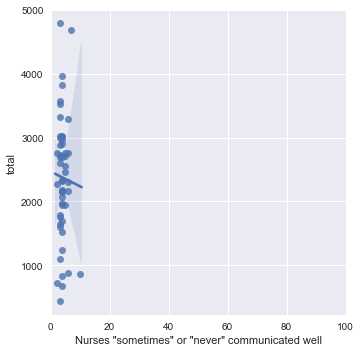

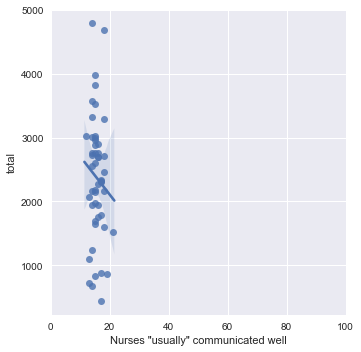

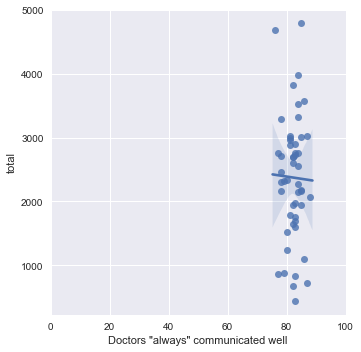

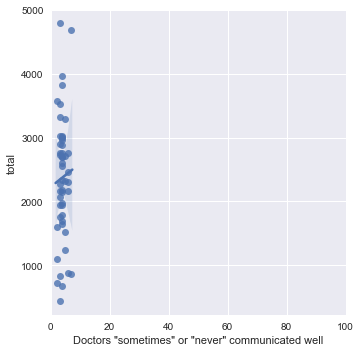

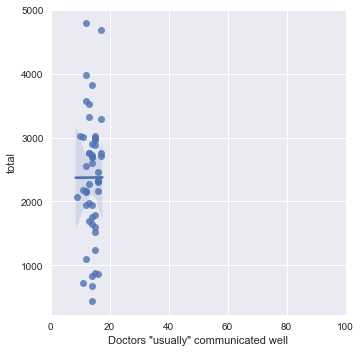

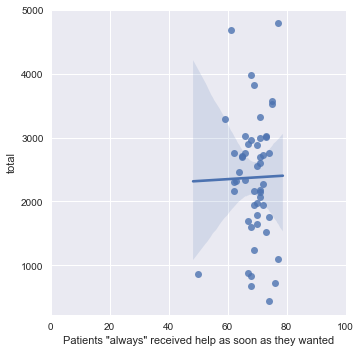

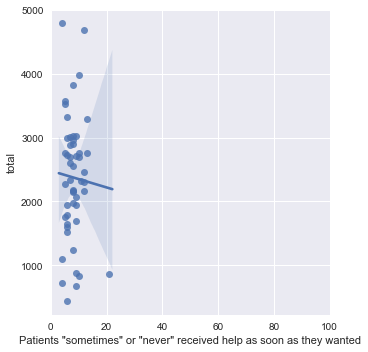

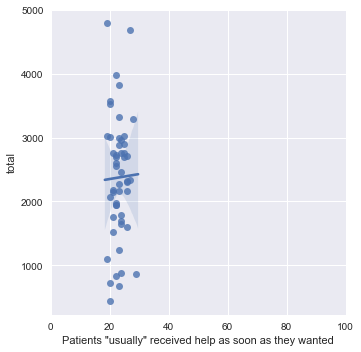

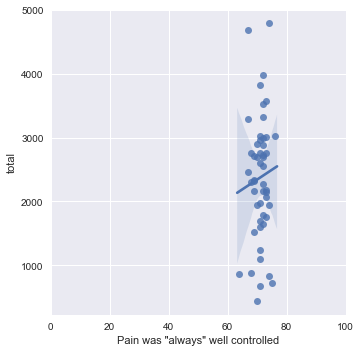

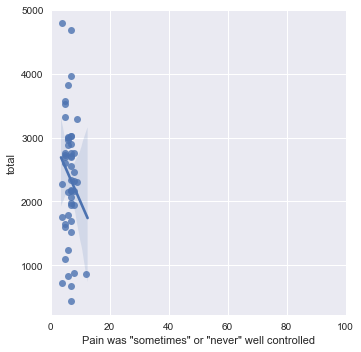

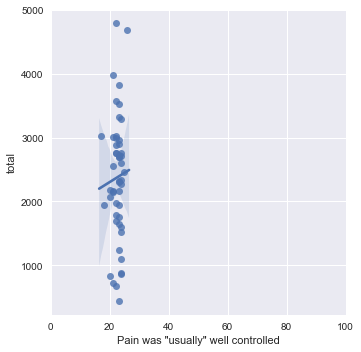

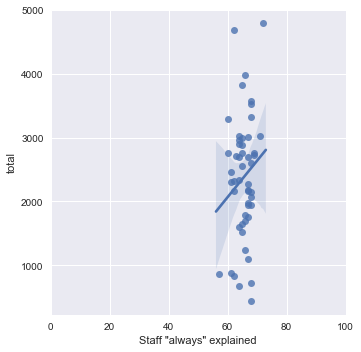

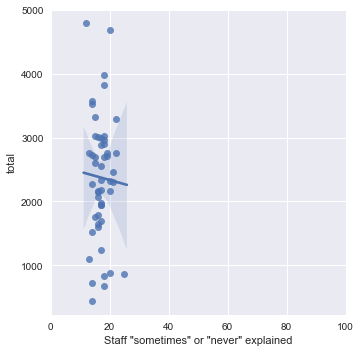

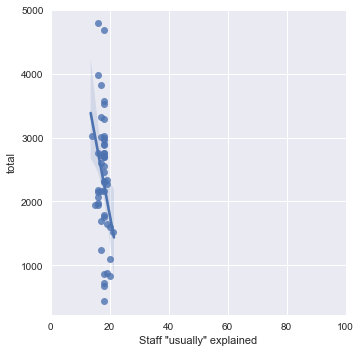

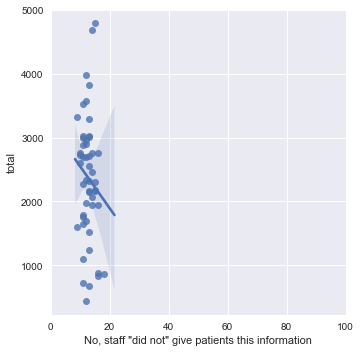

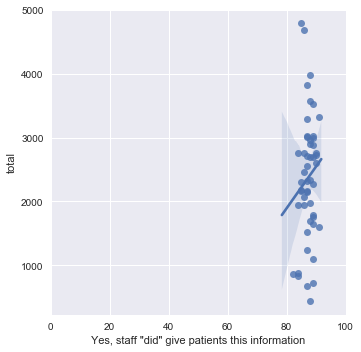

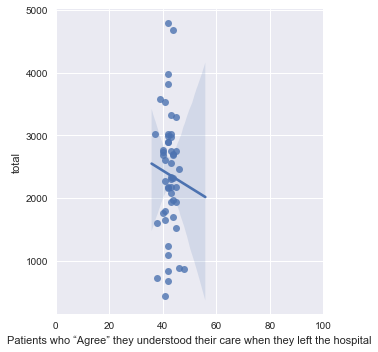

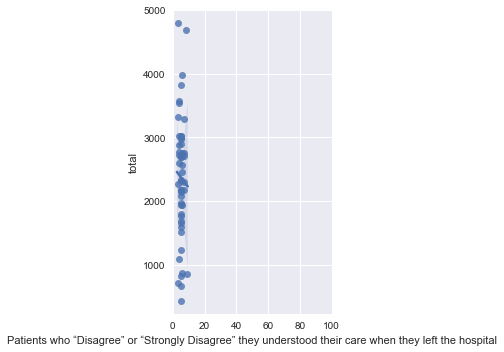

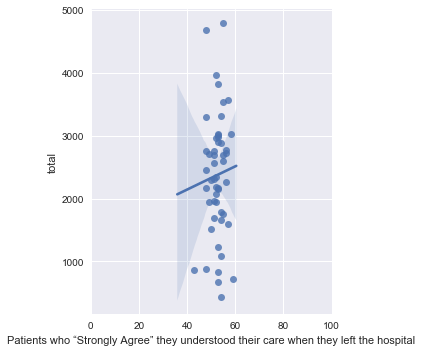

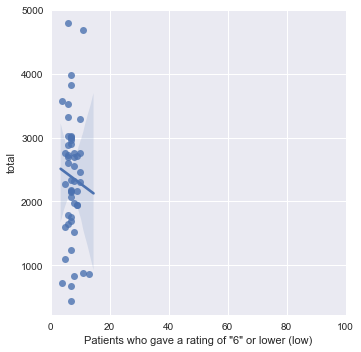

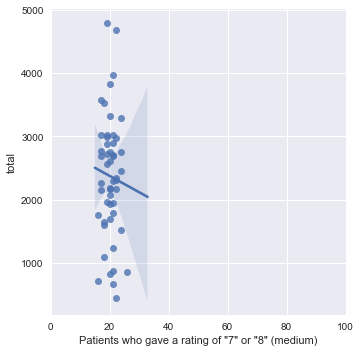

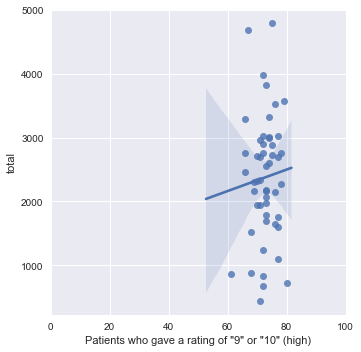

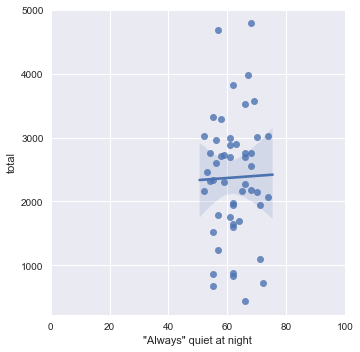

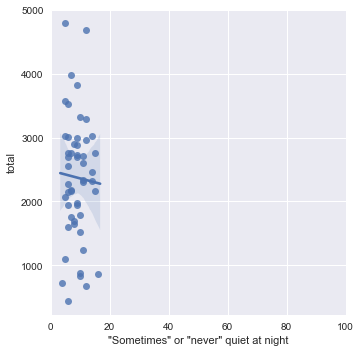

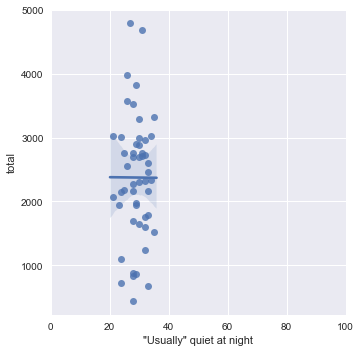

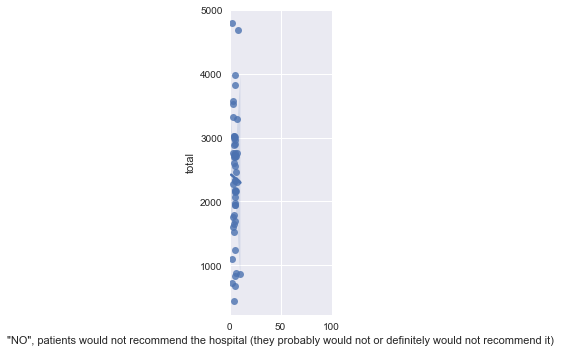

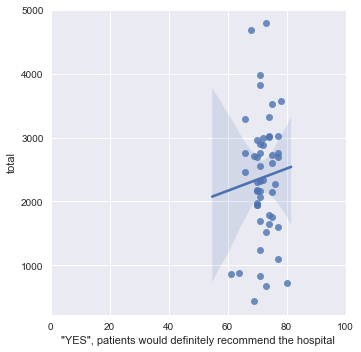

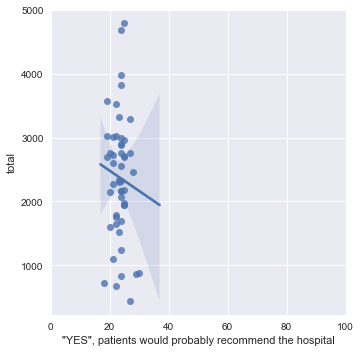

In [47]:
for x in df1.columns:
    sns.lmplot(x=x,y='total',data=df1,fit_reg=True)
    plt.xlim(0,100)
    plt.show()

In [48]:
df1=df1.dropna()

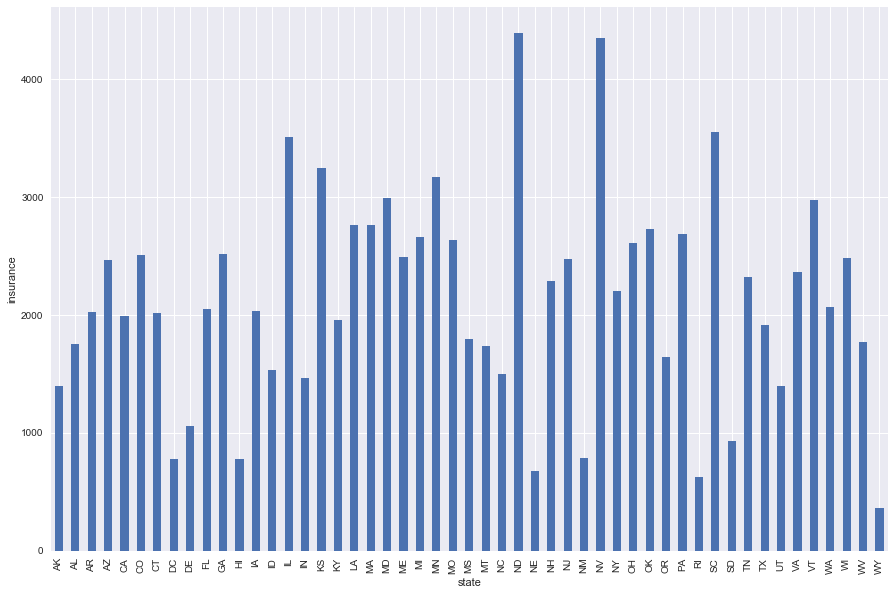

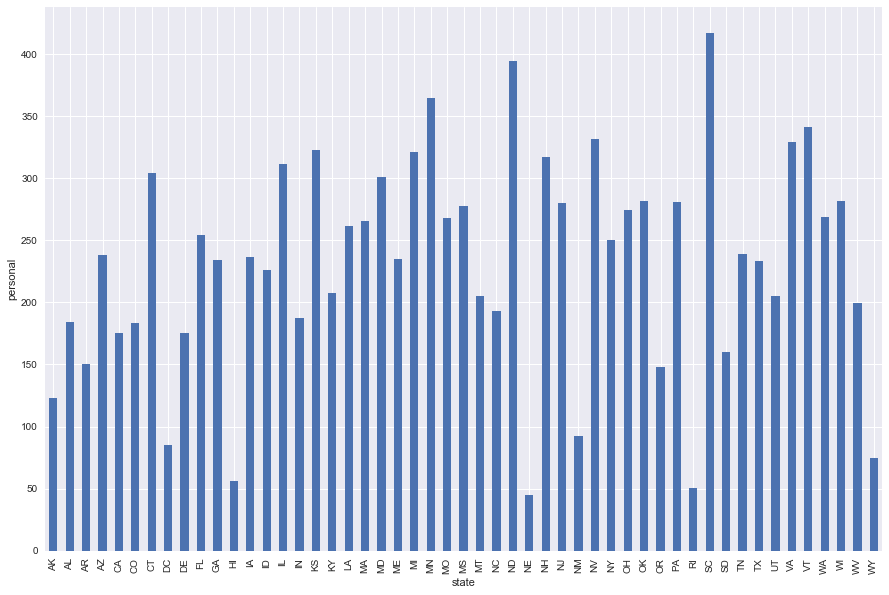

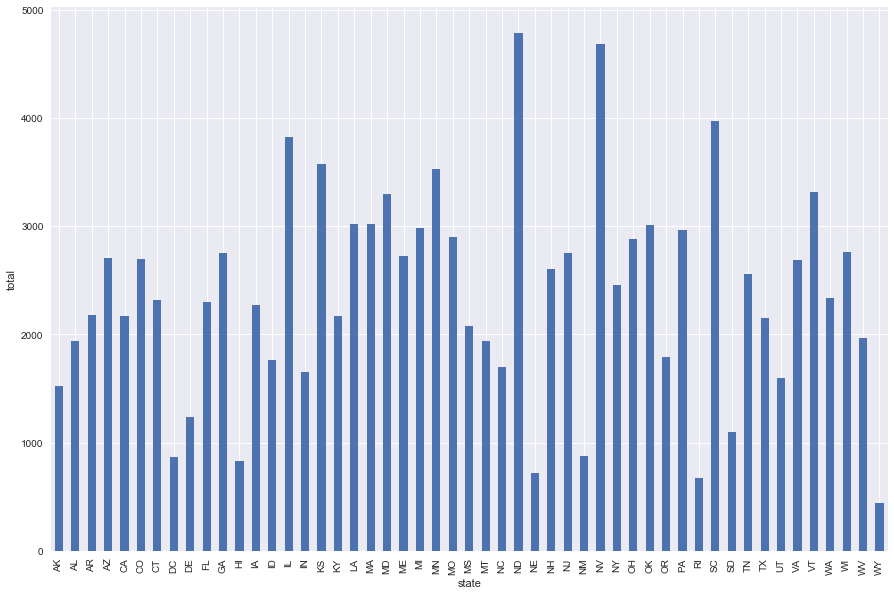

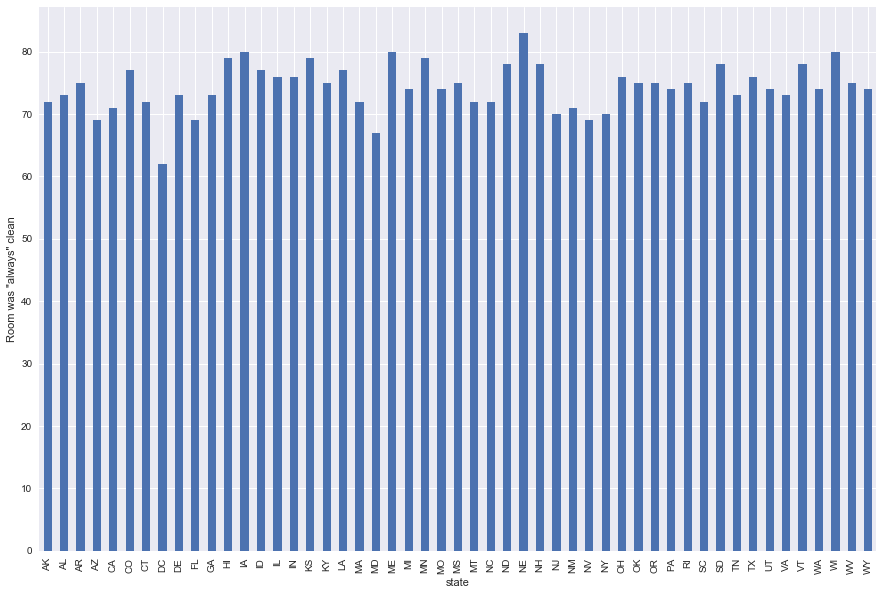

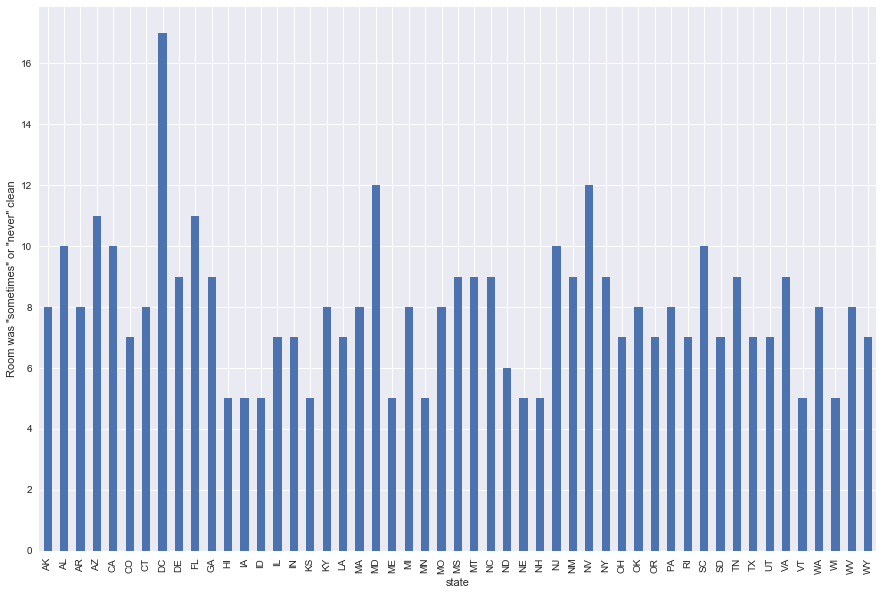

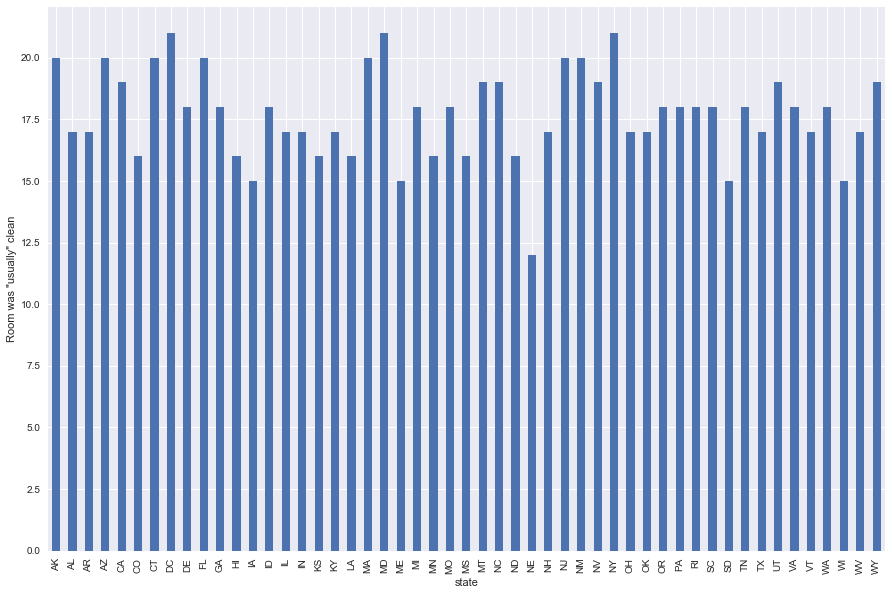

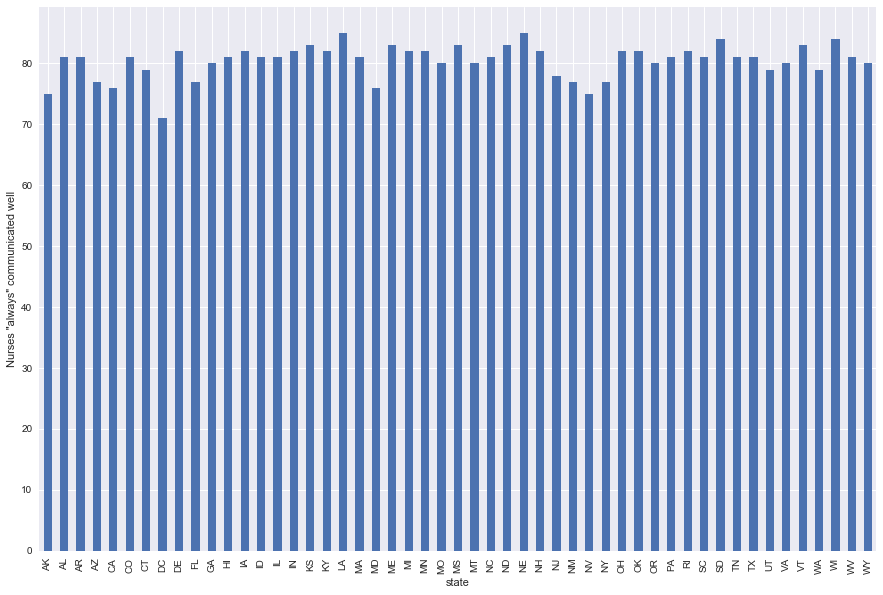

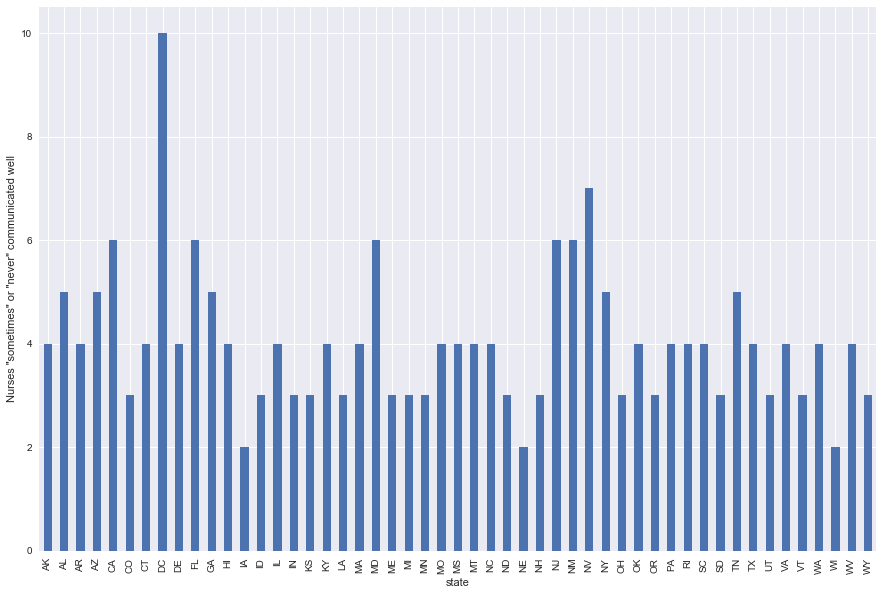

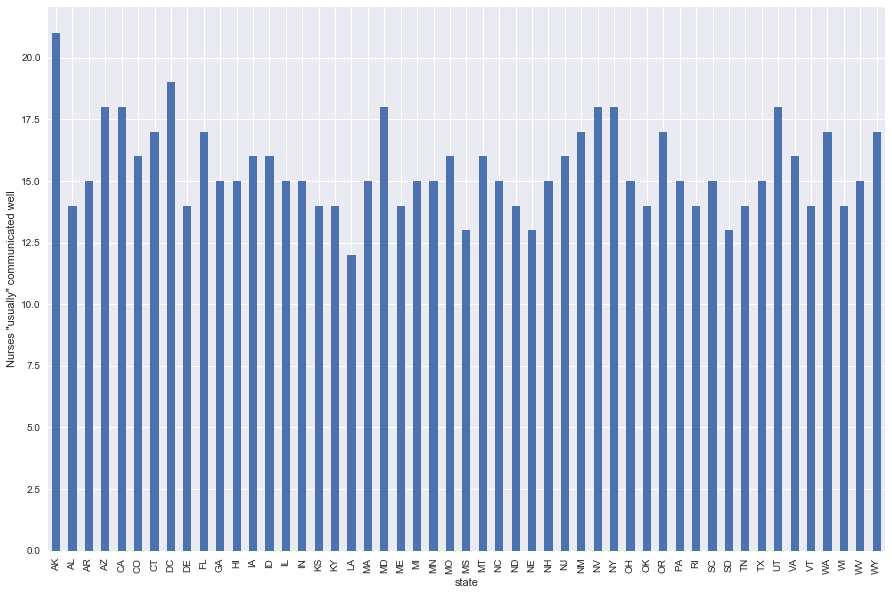

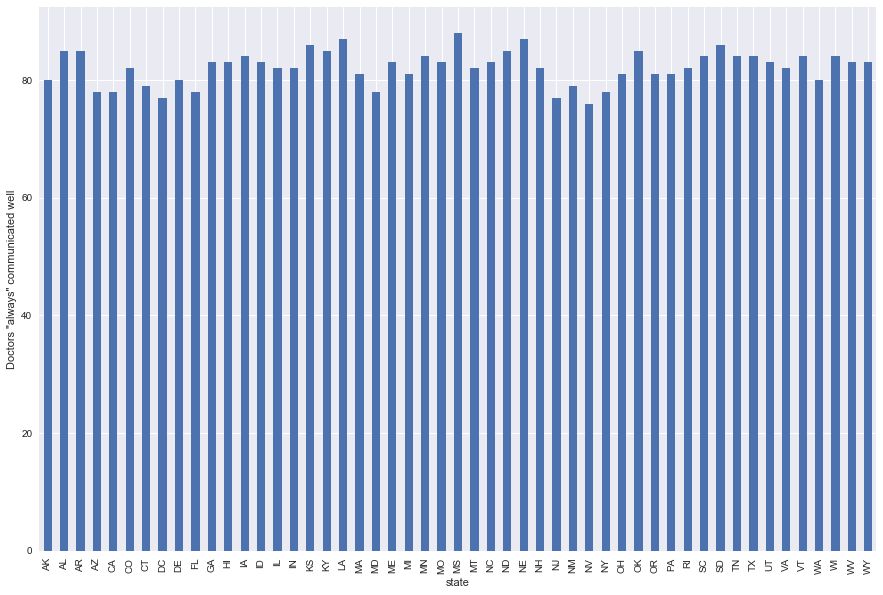

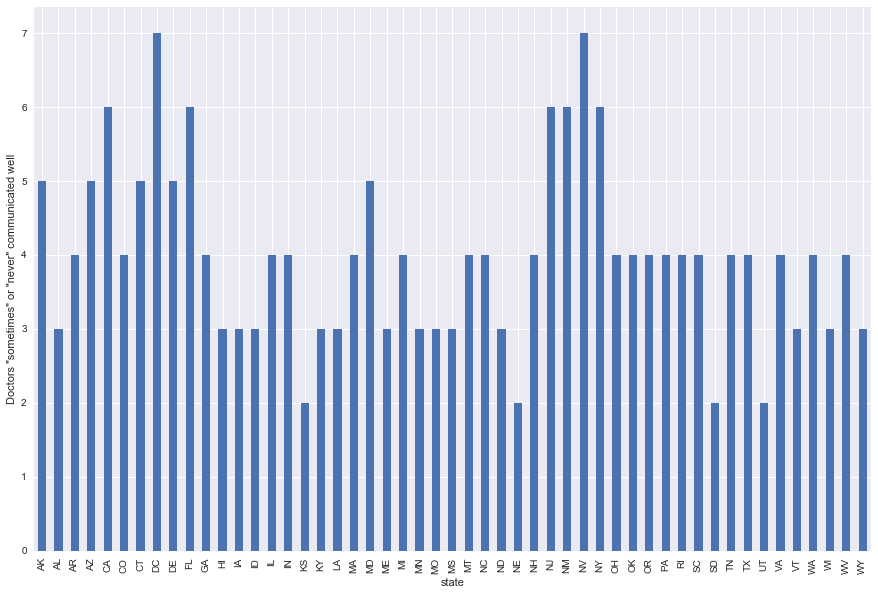

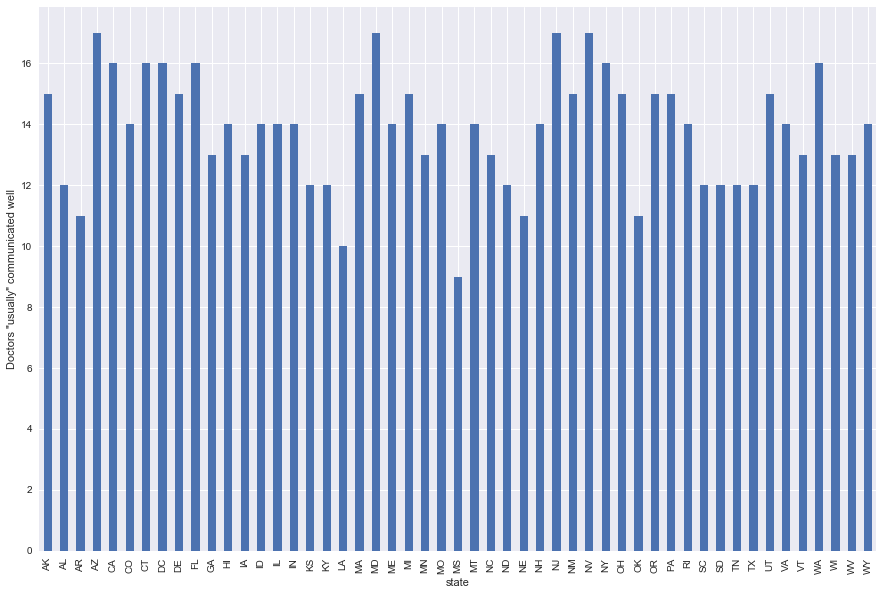

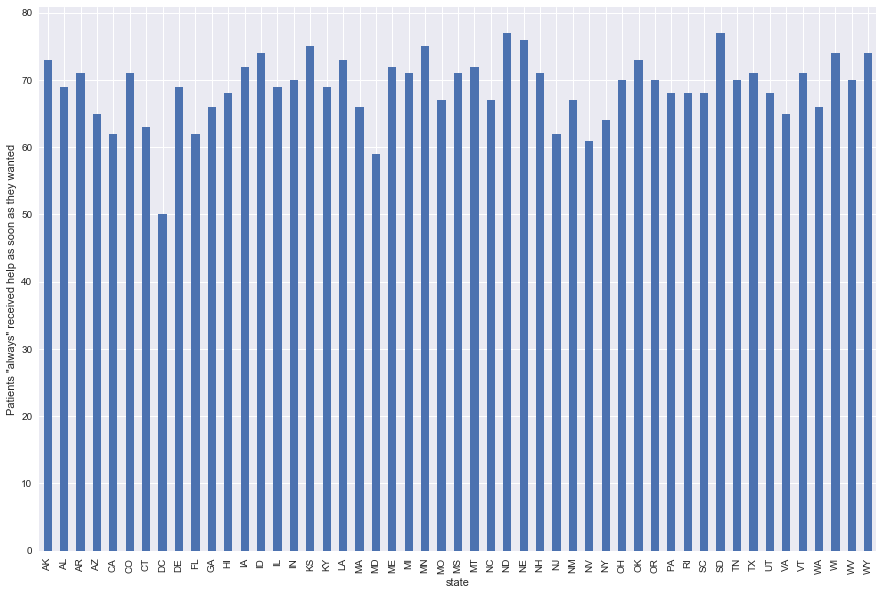

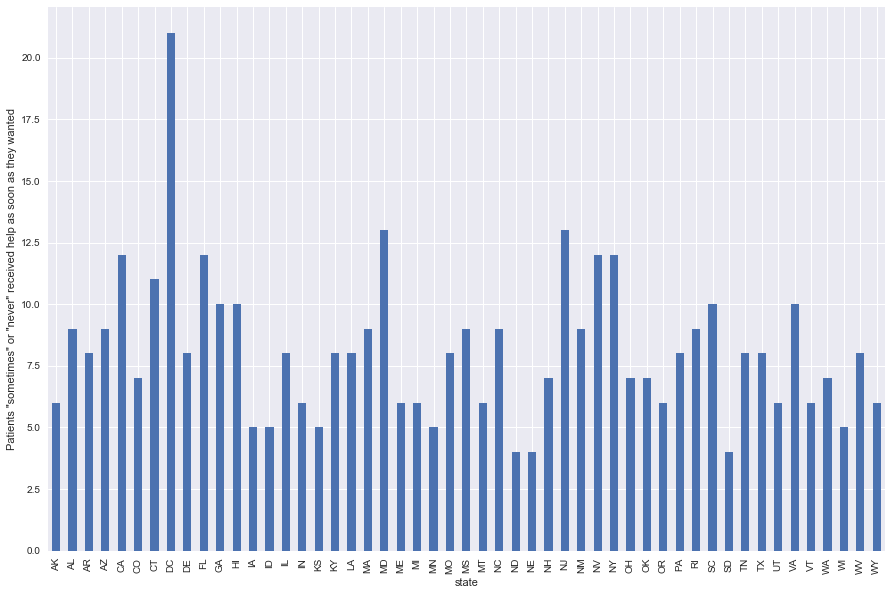

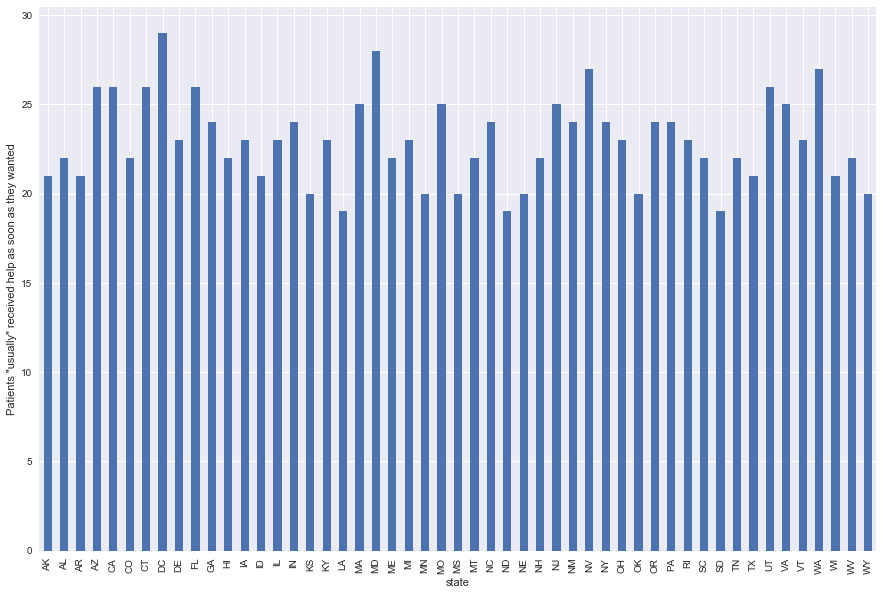

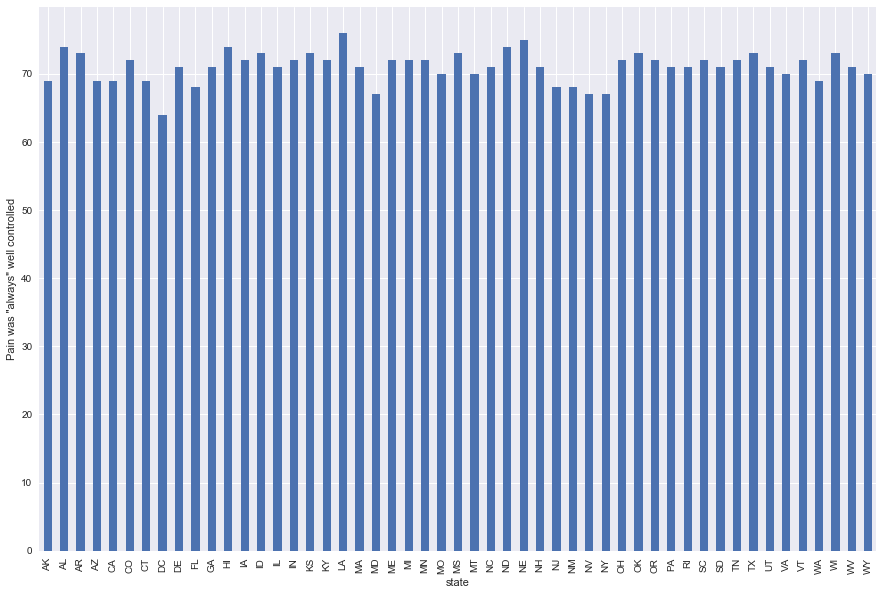

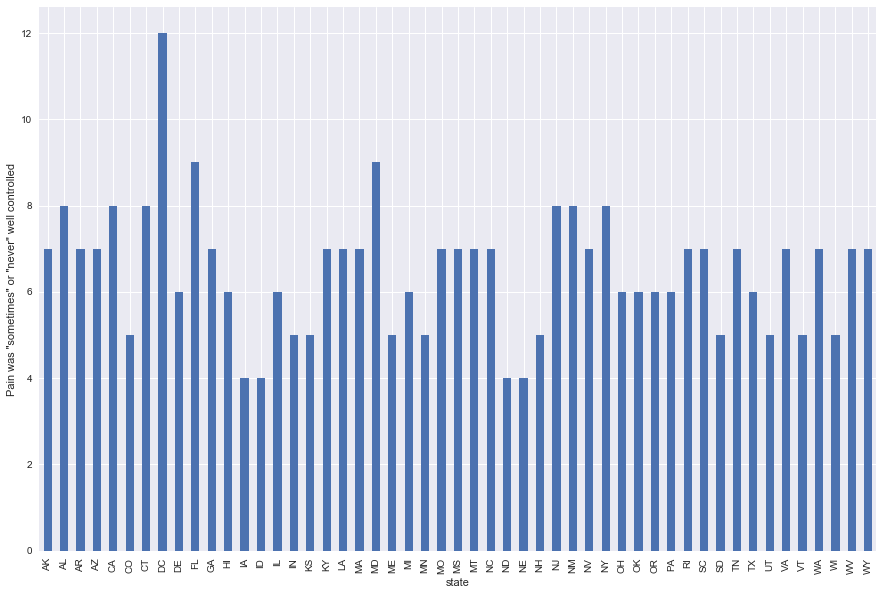

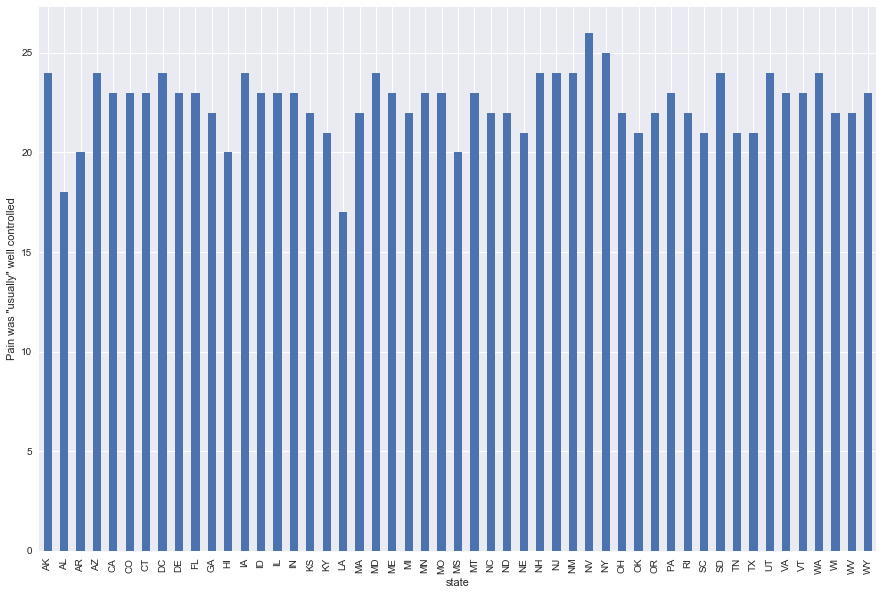

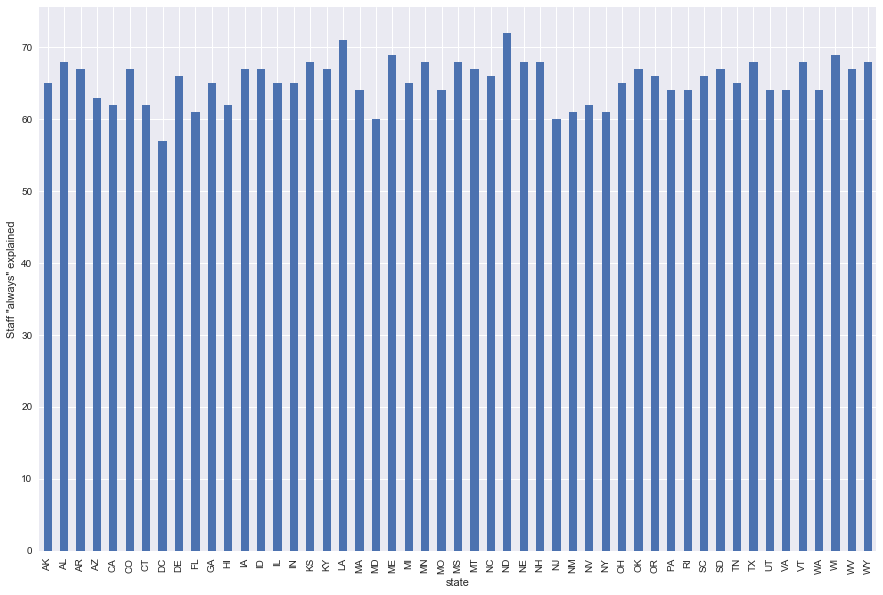

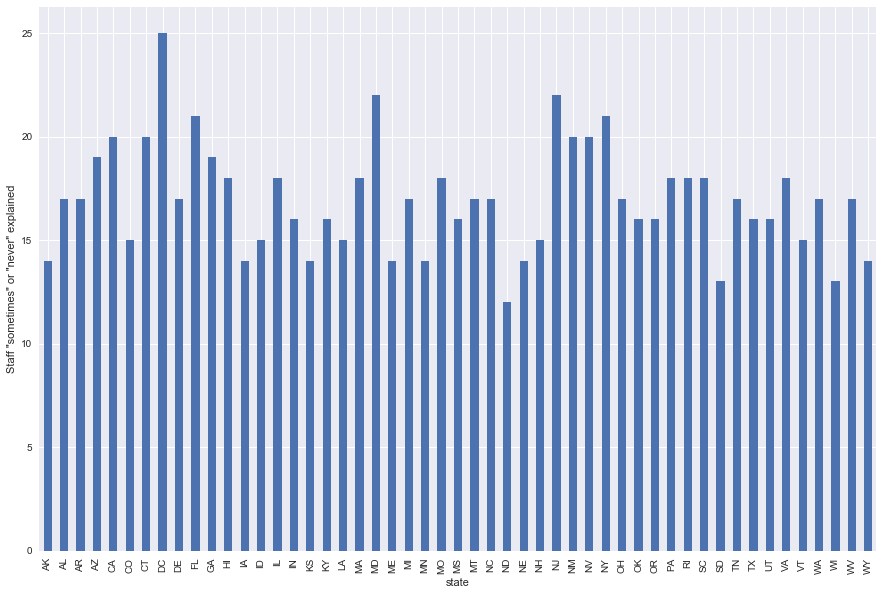

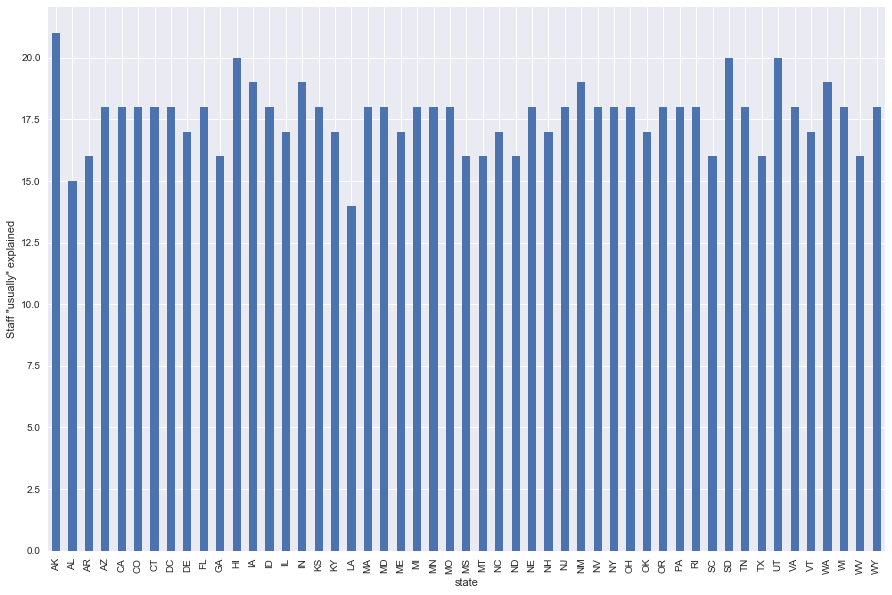

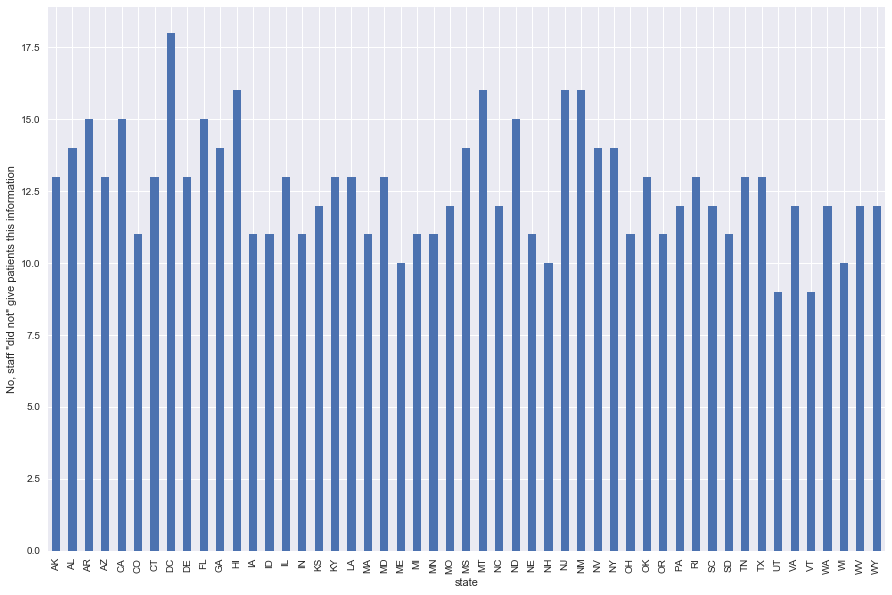

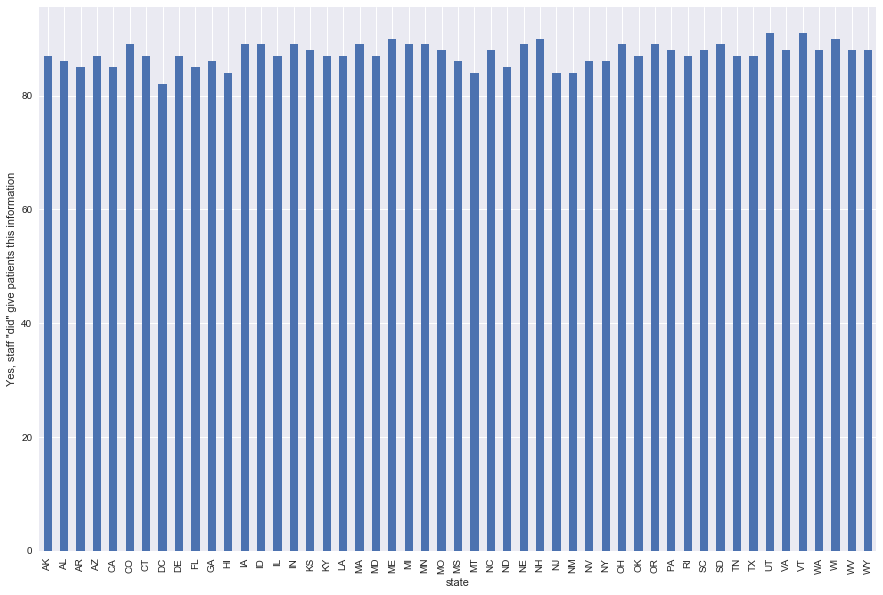

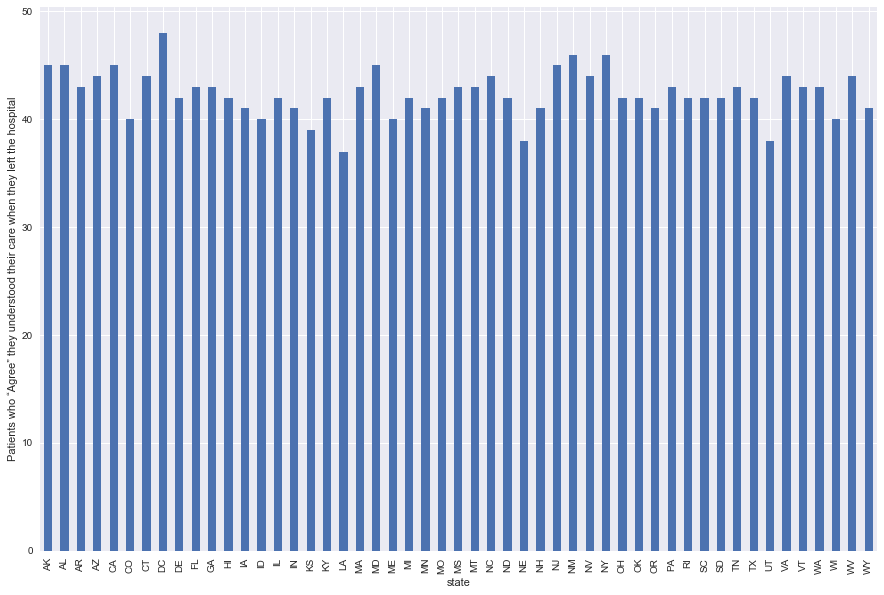

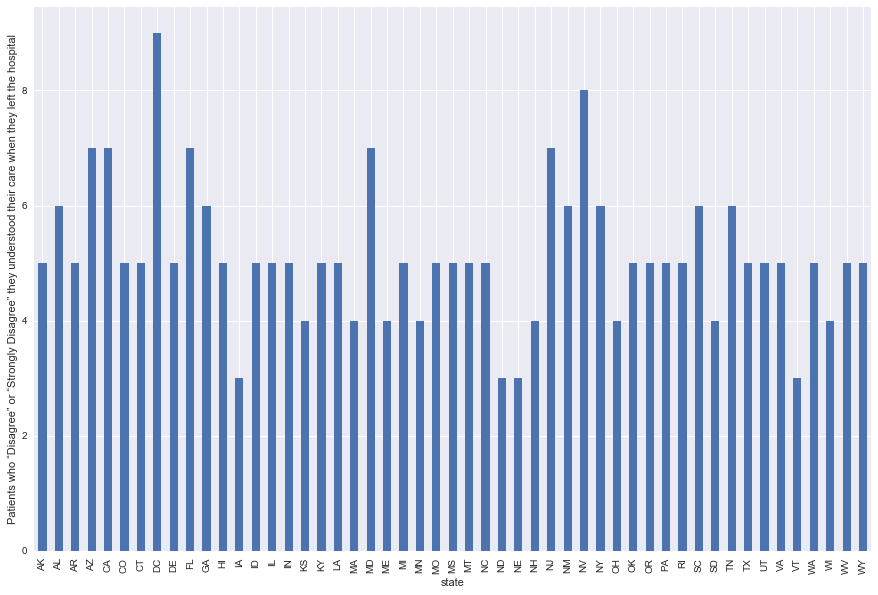

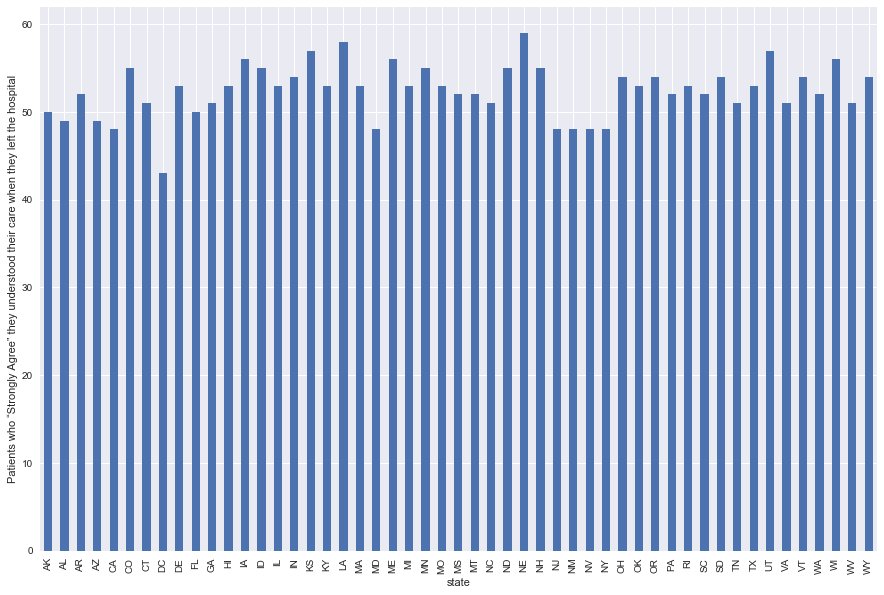

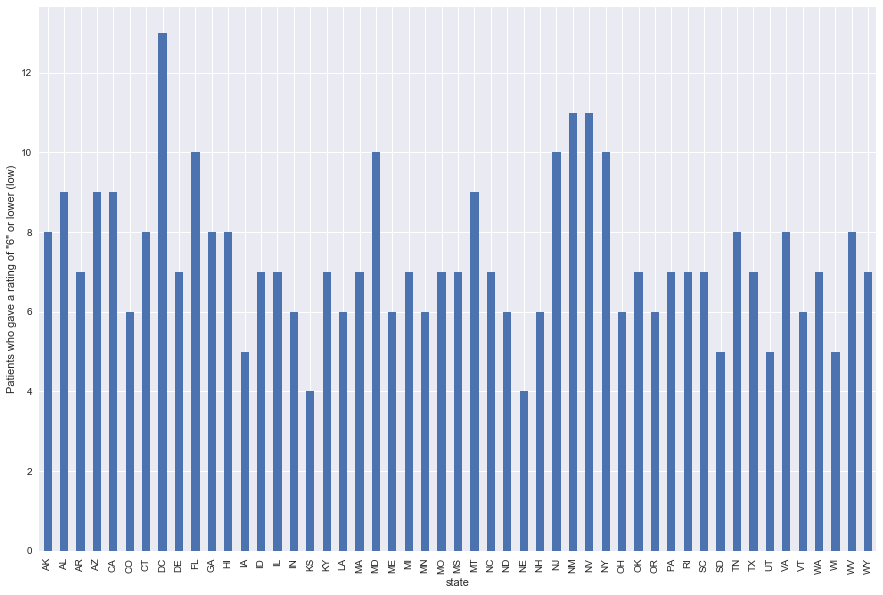

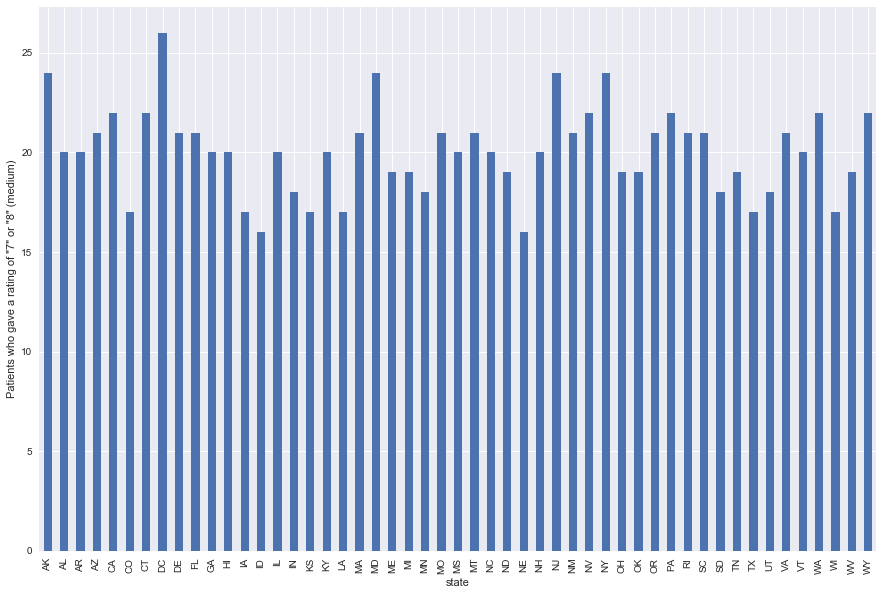

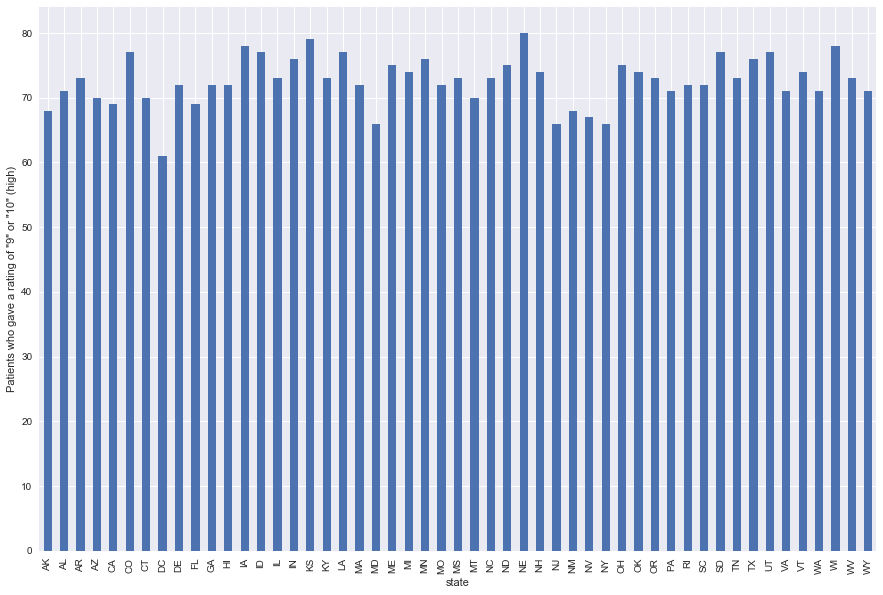

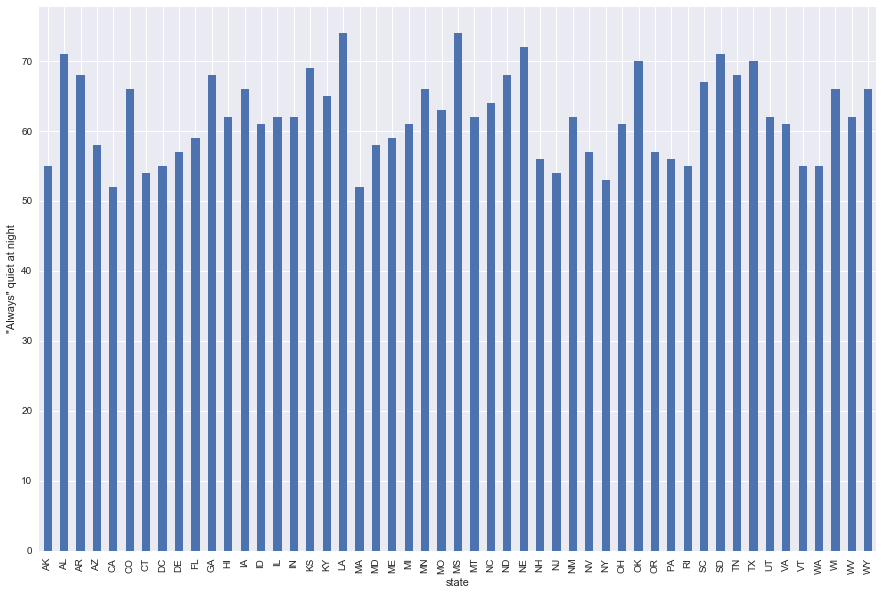

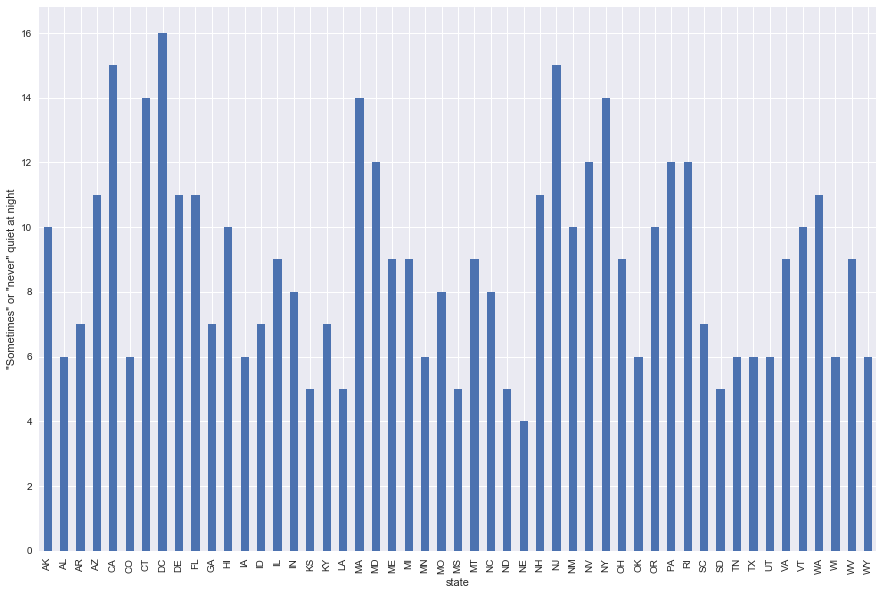

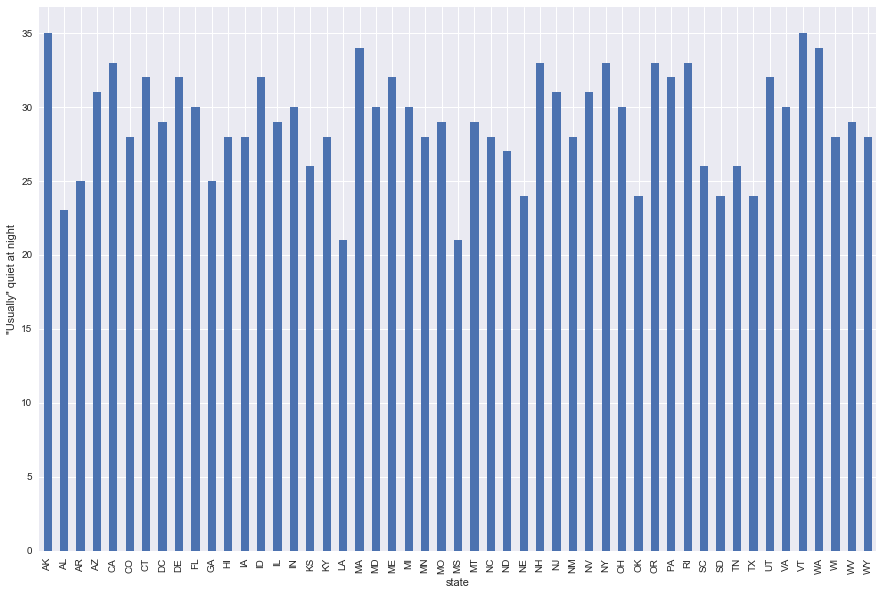

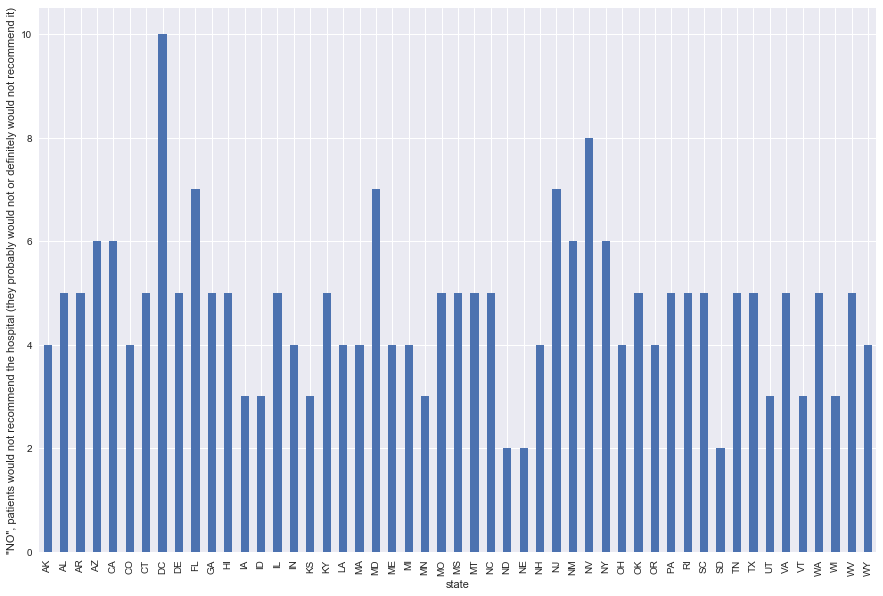

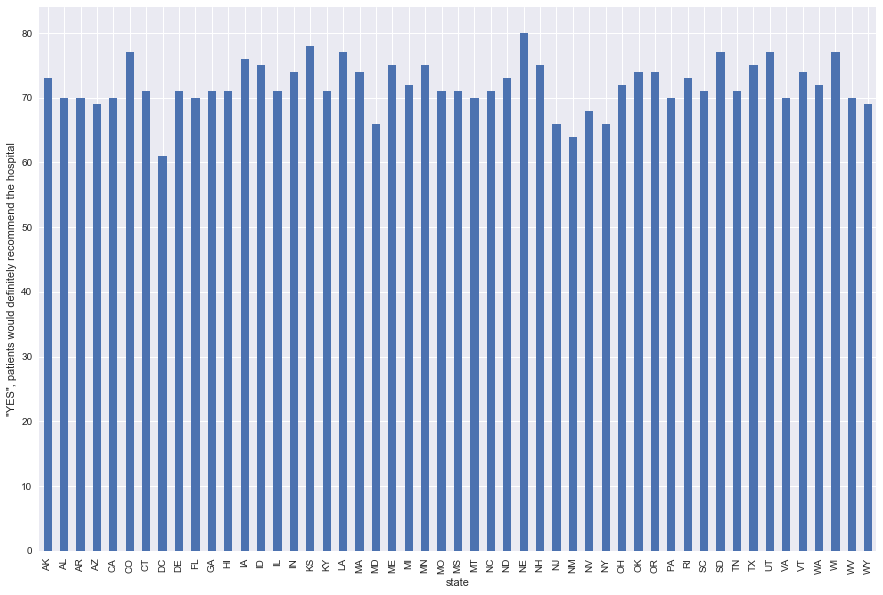

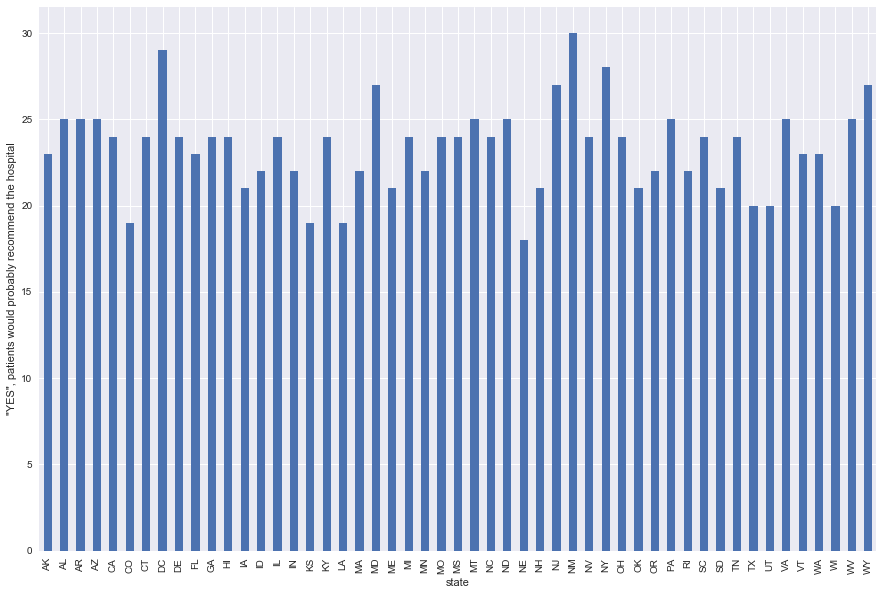

In [49]:
for x in df1.columns:
    
    df1[x].plot.bar()
    plt.ylabel(x)
    plt.show()
    

In [50]:
df1

,insurance,personal,total,"Room was ""always"" clean","Room was ""sometimes"" or ""never"" clean","Room was ""usually"" clean","Nurses ""always"" communicated well","Nurses ""sometimes"" or ""never"" communicated well","Nurses ""usually"" communicated well","Doctors ""always"" communicated well","Doctors ""sometimes"" or ""never"" communicated well","Doctors ""usually"" communicated well","Patients ""always"" received help as soon as they wanted","Patients ""sometimes"" or ""never"" received help as soon as they wanted","Patients ""usually"" received help as soon as they wanted","Pain was ""always"" well controlled","Pain was ""sometimes"" or ""never"" well controlled","Pain was ""usually"" well controlled","Staff ""always"" explained","Staff ""sometimes"" or ""never"" explained","Staff ""usually"" explained","No, staff ""did not"" give patients this information","Yes, staff ""did"" give patients this information",Patients who “Agree” they understood their care when they left the hospital,Patients who “Disagree” or “Strongly Disagree” they understood their care when they left the hospital,Patients who “Strongly Agree” they understood their care when they left the hospital,"Patients who gave a rating of ""6"" or lower (low)","Patients who gave a rating of ""7"" or ""8"" (medium)","Patients who gave a rating of ""9"" or ""10"" (high)","""Always"" quiet at night","""Sometimes"" or ""never"" quiet at night","""Usually"" quiet at night","""NO"", patients would not recommend the hospital (they probably would not or definitely would not recommend it)","""YES"", patients would definitely recommend the hospital","""YES"", patients would probably recommend the hospital"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,1400.00,122.88,1522.88,72.0,8.0,20.0,75.0,4.0,21.0,80.0,5.0,15.0,73.0,6.0,21.0,69.0,7.0,24.0,65.0,14.0,21.0,13.0,87.0,45.0,5.0,50.0,8.0,24.0,68.0,55.0,10.0,35.0,4.0,73.0,23.0
AL,1754.44,184.23,1938.67,73.0,10.0,17.0,81.0,5.0,14.0,85.0,3.0,12.0,69.0,9.0,22.0,74.0,8.0,18.0,68.0,17.0,15.0,14.0,86.0,45.0,6.0,49.0,9.0,20.0,71.0,71.0,6.0,23.0,5.0,70.0,25.0
AR,2027.01,150.29,2177.30,75.0,8.0,17.0,81.0,4.0,15.0,85.0,4.0,11.0,71.0,8.0,21.0,73.0,7.0,20.0,67.0,17.0,16.0,15.0,85.0,43.0,5.0,52.0,7.0,20.0,73.0,68.0,7.0,25.0,5.0,70.0,25.0
AZ,2467.01,238.20,2705.21,69.0,11.0,20.0,77.0,5.0,18.0,78.0,5.0,17.0,65.0,9.0,26.0,69.0,7.0,24.0,63.0,19.0,18.0,13.0,87.0,44.0,7.0,49.0,9.0,21.0,70.0,58.0,11.0,31.0,6.0,69.0,25.0
CA,1994.01,175.31,2169.31,71.0,10.0,19.0,76.0,6.0,18.0,78.0,6.0,16.0,62.0,12.0,26.0,69.0,8.0,23.0,62.0,20.0,18.0,15.0,85.0,45.0,7.0,48.0,9.0,22.0,69.0,52.0,15.0,33.0,6.0,70.0,24.0
CO,2509.34,183.10,2692.44,77.0,7.0,16.0,81.0,3.0,16.0,82.0,4.0,14.0,71.0,7.0,22.0,72.0,5.0,23.0,67.0,15.0,18.0,11.0,89.0,40.0,5.0,55.0,6.0,17.0,77.0,66.0,6.0,28.0,4.0,77.0,19.0
CT,2012.34,304.12,2316.47,72.0,8.0,20.0,79.0,4.0,17.0,79.0,5.0,16.0,63.0,11.0,26.0,69.0,8.0,23.0,62.0,20.0,18.0,13.0,87.0,44.0,5.0,51.0,8.0,22.0,70.0,54.0,14.0,32.0,5.0,71.0,24.0
DC,777.78,85.33,863.11,62.0,17.0,21.0,71.0,10.0,19.0,77.0,7.0,16.0,50.0,21.0,29.0,64.0,12.0,24.0,57.0,25.0,18.0,18.0,82.0,48.0,9.0,43.0,13.0,26.0,61.0,55.0,16.0,29.0,10.0,61.0,29.0
DE,1061.43,175.54,1236.97,73.0,9.0,18.0,82.0,4.0,14.0,80.0,5.0,15.0,69.0,8.0,23.0,71.0,6.0,23.0,66.0,17.0,17.0,13.0,87.0,42.0,5.0,53.0,7.0,21.0,72.0,57.0,11.0,32.0,5.0,71.0,24.0


In [51]:
dissatisfied=['never','did not','Disagree','low','not recommend']

l=[]
for x in df1.columns:
    for j in dissatisfied:
        if j in x:
            l.append(x)

df1['patient_dissatisfaction']=df1[l].sum(axis=1)

In [52]:
happy=['always','did','Strongly Agree','high','definitely']

p=[]
for x in df1.columns:
    for j in happy:
        if j in x:
            p.append(x)

df1['patient_happiness']=df1[p].sum(axis=1)

In [53]:
neutral=['usually','did','Agree','medium','probably']

q=[]
for x in df1.columns:
    for j in neutral:
        if j in x:
            q.append(x)

df1['patient_neutral']=df1[q].sum(axis=1)

In [54]:
list(df1)

['insurance',
 'personal',
 'total',
 'Room was "always" clean',
 'Room was "sometimes" or "never" clean',
 'Room was "usually" clean',
 'Nurses "always" communicated well',
 'Nurses "sometimes" or "never" communicated well',
 'Nurses "usually" communicated well',
 'Doctors "always" communicated well',
 'Doctors "sometimes" or "never" communicated well',
 'Doctors "usually" communicated well',
 'Patients "always" received help as soon as they wanted',
 'Patients "sometimes" or "never" received help as soon as they wanted',
 'Patients "usually" received help as soon as they wanted',
 'Pain was "always" well controlled',
 'Pain was "sometimes" or "never" well controlled',
 'Pain was "usually" well controlled',
 'Staff "always" explained',
 'Staff "sometimes" or "never" explained',
 'Staff "usually" explained',
 'No, staff "did not" give patients this information',
 'Yes, staff "did" give patients this information',
 'Patients who “Agree” they understood their care when they left the hosp

In [55]:
df_=df1[['insurance',
 'personal',
 'total','patient_dissatisfaction',
 'patient_happiness',
 'patient_neutral']]

In [56]:
df_['percent']=df_['personal']/df_['total']

C:\Users\ankitkt\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_=df_.sort_values(by='percent')

In [58]:
df_

,insurance,personal,total,patient_dissatisfaction,patient_happiness,patient_neutral,percent
state,,,,,,,
NE,673.91,44.52,718.43,55.0,795.0,328.0,0.061968
HI,774.55,55.85,830.40,90.0,748.0,351.0,0.067257
CO,2509.34,183.10,2692.44,73.0,763.0,344.0,0.068005
AR,2027.01,150.29,2177.30,87.0,752.0,345.0,0.069026
NV,4352.57,331.46,4684.03,118.0,701.0,371.0,0.070764
RI,623.44,50.36,673.80,91.0,745.0,352.0,0.074740
AK,1400.00,122.88,1522.88,84.0,729.0,368.0,0.080689
CA,1994.01,175.31,2169.31,114.0,711.0,365.0,0.080814
IL,3511.23,311.70,3822.93,86.0,746.0,353.0,0.081534


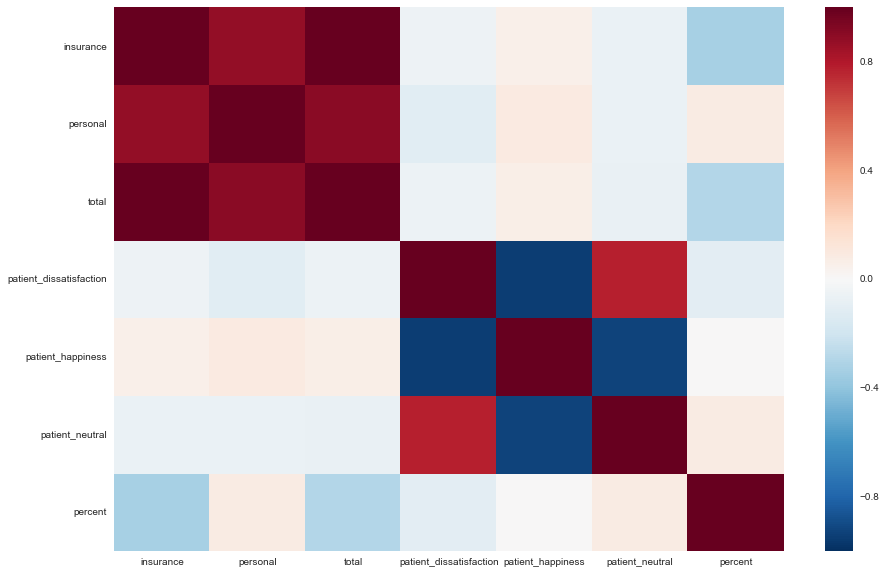

In [59]:
sns.heatmap(df_.corr())

In [60]:
df2

,"Room was ""always"" clean","Room was ""sometimes"" or ""never"" clean","Room was ""usually"" clean","Nurses ""always"" communicated well","Nurses ""sometimes"" or ""never"" communicated well","Nurses ""usually"" communicated well","Doctors ""always"" communicated well","Doctors ""sometimes"" or ""never"" communicated well","Doctors ""usually"" communicated well","Patients ""always"" received help as soon as they wanted","Patients ""sometimes"" or ""never"" received help as soon as they wanted","Patients ""usually"" received help as soon as they wanted","Pain was ""always"" well controlled","Pain was ""sometimes"" or ""never"" well controlled","Pain was ""usually"" well controlled","Staff ""always"" explained","Staff ""sometimes"" or ""never"" explained","Staff ""usually"" explained","No, staff ""did not"" give patients this information","Yes, staff ""did"" give patients this information",Patients who “Agree” they understood their care when they left the hospital,Patients who “Disagree” or “Strongly Disagree” they understood their care when they left the hospital,Patients who “Strongly Agree” they understood their care when they left the hospital,"Patients who gave a rating of ""6"" or lower (low)","Patients who gave a rating of ""7"" or ""8"" (medium)","Patients who gave a rating of ""9"" or ""10"" (high)","""Always"" quiet at night","""Sometimes"" or ""never"" quiet at night","""Usually"" quiet at night","""NO"", patients would not recommend the hospital (they probably would not or definitely would not recommend it)","""YES"", patients would definitely recommend the hospital","""YES"", patients would probably recommend the hospital"
AK,72%,8%,20%,75%,4%,21%,80%,5%,15%,73%,6%,21%,69%,7%,24%,65%,14%,21%,13%,87%,45%,5%,50%,8%,24%,68%,55%,10%,35%,4%,73%,23%
AL,73%,10%,17%,81%,5%,14%,85%,3%,12%,69%,9%,22%,74%,8%,18%,68%,17%,15%,14%,86%,45%,6%,49%,9%,20%,71%,71%,6%,23%,5%,70%,25%
AR,75%,8%,17%,81%,4%,15%,85%,4%,11%,71%,8%,21%,73%,7%,20%,67%,17%,16%,15%,85%,43%,5%,52%,7%,20%,73%,68%,7%,25%,5%,70%,25%
AS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
AZ,69%,11%,20%,77%,5%,18%,78%,5%,17%,65%,9%,26%,69%,7%,24%,63%,19%,18%,13%,87%,44%,7%,49%,9%,21%,70%,58%,11%,31%,6%,69%,25%
CA,71%,10%,19%,76%,6%,18%,78%,6%,16%,62%,12%,26%,69%,8%,23%,62%,20%,18%,15%,85%,45%,7%,48%,9%,22%,69%,52%,15%,33%,6%,70%,24%
CO,77%,7%,16%,81%,3%,16%,82%,4%,14%,71%,7%,22%,72%,5%,23%,67%,15%,18%,11%,89%,40%,5%,55%,6%,17%,77%,66%,6%,28%,4%,77%,19%
DC,62%,17%,21%,71%,10%,19%,77%,7%,16%,50%,21%,29%,64%,12%,24%,57%,25%,18%,18%,82%,48%,9%,43%,13%,26%,61%,55%,16%,29%,10%,61%,29%
CT,72%,8%,20%,79%,4%,17%,79%,5%,16%,63%,11%,26%,69%,8%,23%,62%,20%,18%,13%,87%,44%,5%,51%,8%,22%,70%,54%,14%,32%,5%,71%,24%
FL,69%,11%,20%,77%,6%,17%,78%,6%,16%,62%,12%,26%,68%,9%,23%,61%,21%,18%,15%,85%,43%,7%,50%,10%,21%,69%,59%,11%,30%,7%,70%,23%
